In [7]:
library(tidyverse)
library(tidyquant)
library(scales)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.4.4     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: PerformanceAnalytics

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, whi

In [11]:
prices <- tq_get("AAPL",
  get = "stock.price",
  from = "2000-01-01",
  to = "2022-12-31"
)
prices

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,535796800,0.8472066
AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,512377600,0.7757787
AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,778321600,0.7871307
AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,767972800,0.7190139
AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,460734400,0.7530727
AAPL,2000-01-10,0.910714,0.912946,0.845982,0.872768,505064000,0.7398277
AAPL,2000-01-11,0.856585,0.887277,0.808036,0.828125,441548800,0.7019848
AAPL,2000-01-12,0.848214,0.852679,0.772321,0.778460,976068800,0.6598848
AAPL,2000-01-13,0.843610,0.881696,0.825893,0.863839,1032684800,0.7322588


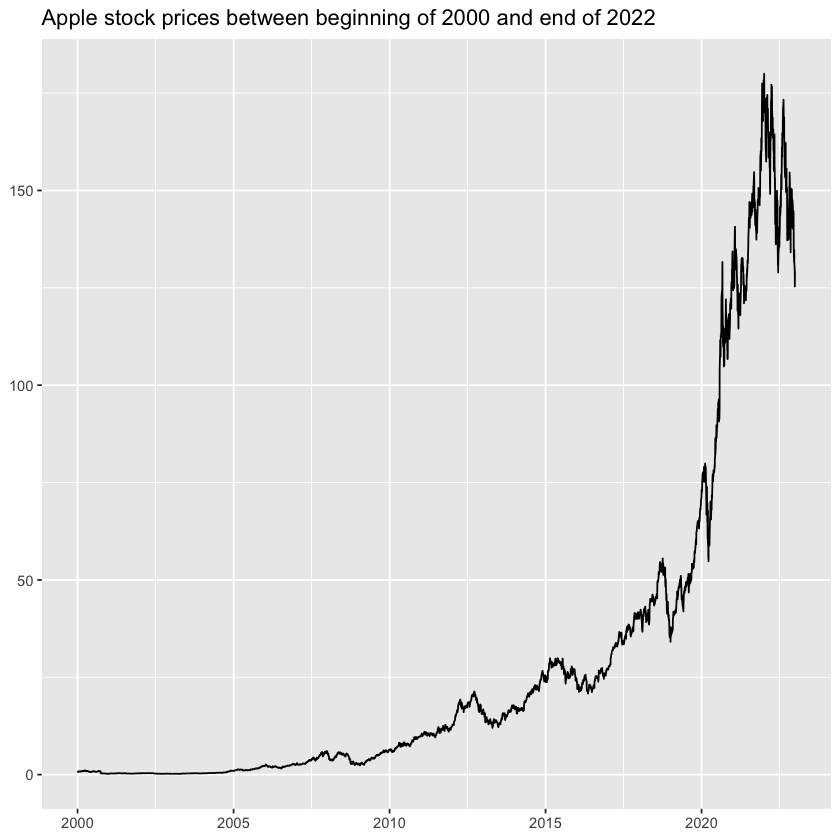

In [12]:
prices |>
  ggplot(aes(x = date, y = adjusted)) +
  geom_line() +
  labs(
    x = NULL,
    y = NULL,
    title = "Apple stock prices between beginning of 2000 and end of 2022"
  )

In [13]:
returns <- prices |>
  arrange(date) |>
  mutate(ret = adjusted / lag(adjusted) - 1) |>
  select(symbol, date, ret)
returns

symbol,date,ret
<chr>,<date>,<dbl>
AAPL,2000-01-03,NA
AAPL,2000-01-04,-0.084309875
AAPL,2000-01-05,0.014632965
AAPL,2000-01-06,-0.086538091
AAPL,2000-01-07,0.047368862
AAPL,2000-01-10,-0.017588004
AAPL,2000-01-11,-0.051151004
AAPL,2000-01-12,-0.059972744
AAPL,2000-01-13,0.109676697


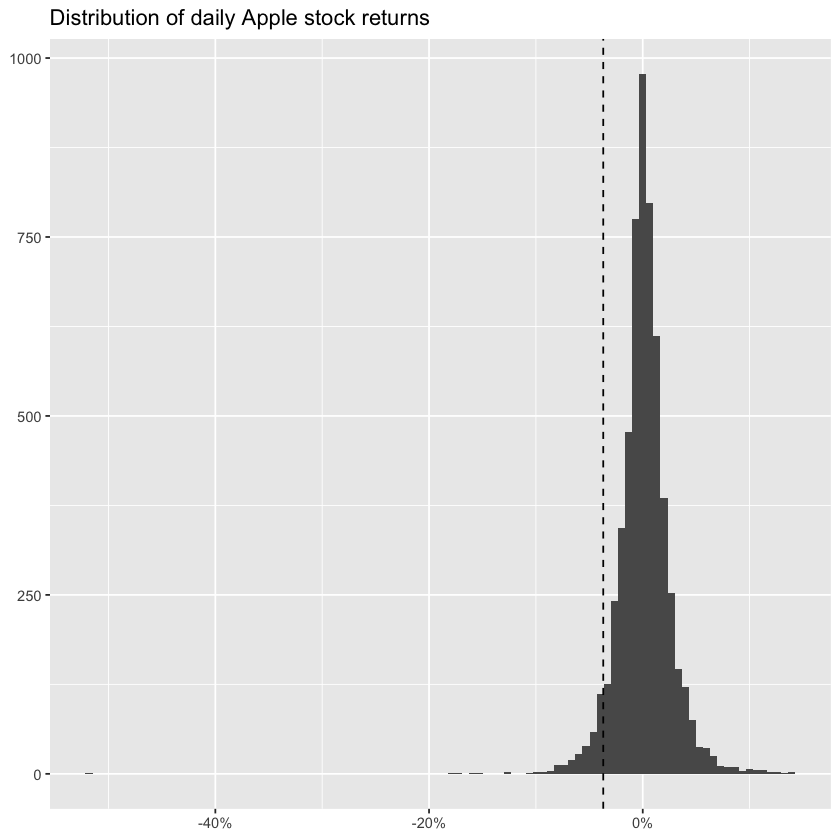

In [14]:
returns <- returns |>
  drop_na(ret)

quantile_05 <- quantile(returns |> pull(ret), probs = 0.05)
returns |>
  ggplot(aes(x = ret)) +
  geom_histogram(bins = 100) +
  geom_vline(aes(xintercept = quantile_05),
    linetype = "dashed"
  ) +
  labs(
    x = NULL,
    y = NULL,
    title = "Distribution of daily Apple stock returns"
  ) +
  scale_x_continuous(labels = percent)

In [15]:
returns |>
  group_by(year = year(date)) |>
  summarize(across(
    ret,
    list(
      daily_mean = mean,
      daily_sd = sd,
      daily_min = min,
      daily_max = max
    ),
    .names = "{.fn}"
  )) |>
  print(n = Inf)

# A tibble: 23 x 5
    year daily_mean daily_sd daily_min daily_max
   <dbl>      <dbl>    <dbl>     <dbl>     <dbl>
 1  2000 -0.00346     0.0549   -0.519     0.137 
 2  2001  0.00233     0.0393   -0.172     0.129 
 3  2002 -0.00121     0.0305   -0.150     0.0846
 4  2003  0.00186     0.0234   -0.0814    0.113 
 5  2004  0.00470     0.0255   -0.0558    0.132 
 6  2005  0.00349     0.0245   -0.0921    0.0912
 7  2006  0.000949    0.0243   -0.0633    0.118 
 8  2007  0.00366     0.0238   -0.0702    0.105 
 9  2008 -0.00265     0.0367   -0.179     0.139 
10  2009  0.00382     0.0214   -0.0502    0.0676
11  2010  0.00183     0.0169   -0.0496    0.0769
12  2011  0.00104     0.0165   -0.0559    0.0589
13  2012  0.00130     0.0186   -0.0644    0.0887
14  2013  0.000472    0.0180   -0.124     0.0514
15  2014  0.00145     0.0136   -0.0799    0.0820
16  2015  0.0000199   0.0168   -0.0612    0.0574
17  2016  0.000575    0.0147   -0.0657    0.0650
18  2017  0.00164     0.0111   -0.0388    0.0610
1

#### Scailing up

In [16]:
symbols <- tq_index("DOW") |> 
  filter(company != "US DOLLAR")
symbols

Getting holdings for DOW



symbol,company,identifier,sedol,weight,sector,shares_held,local_currency
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
UNH,UNITEDHEALTH GROUP INC,91324P102,2917766,0.091525953,-,5747928,USD
MSFT,MICROSOFT CORP,594918104,2588173,0.068804452,-,5747928,USD
GS,GOLDMAN SACHS GROUP INC,38141G104,2407966,0.067073191,-,5747928,USD
HD,HOME DEPOT INC,437076102,2434209,0.063191072,-,5747928,USD
AMGN,AMGEN INC,031162100,2023607,0.053503409,-,5747928,USD
MCD,MCDONALD S CORP,580135101,2550707,0.051319055,-,5747928,USD
CAT,CATERPILLAR INC,149123101,2180201,0.050638543,-,5747928,USD
CRM,SALESFORCE INC,79466L302,2310525,0.047458092,-,5747928,USD
V,VISA INC CLASS A SHARES,92826C839,B2PZN04,0.046761712,-,5747928,USD


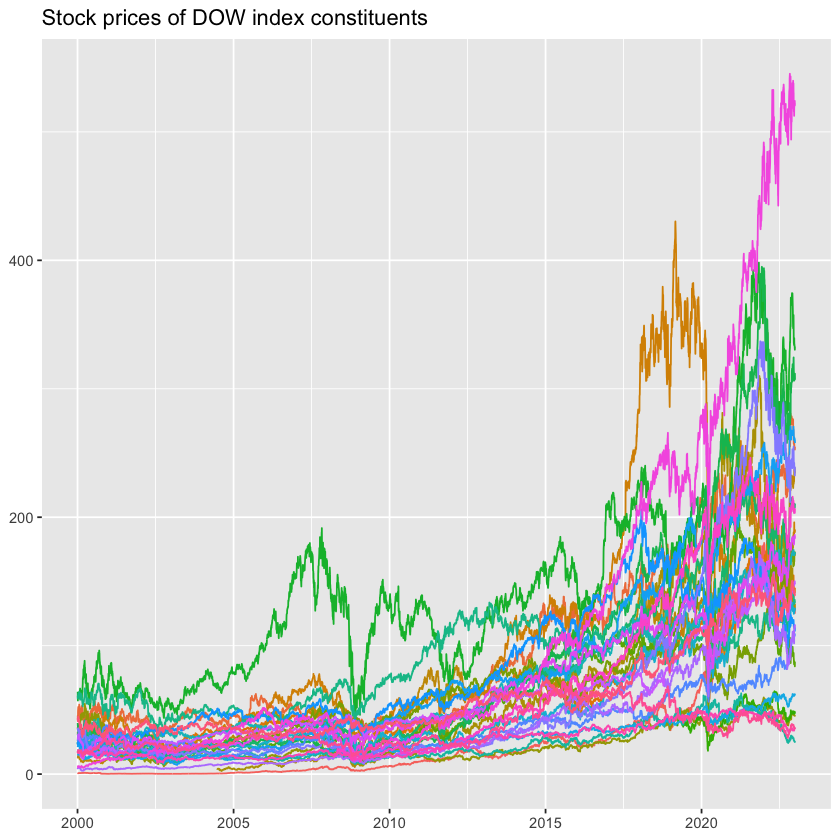

In [17]:
index_prices <- tq_get(symbols,
  get = "stock.prices",
  from = "2000-01-01",
  to = "2022-12-31"
)

index_prices |>
  ggplot(aes(
    x = date,
    y = adjusted,
    color = symbol
  )) +
  geom_line() +
  labs(
    x = NULL,
    y = NULL,
    color = NULL,
    title = "Stock prices of DOW index constituents"
  ) +
  theme(legend.position = "none")

In [18]:
all_returns <- index_prices |>
  group_by(symbol) |>
  mutate(ret = adjusted / lag(adjusted) - 1) |>
  select(symbol, date, ret) |>
  drop_na(ret)

all_returns |>
  group_by(symbol) |>
  summarize(across(
    ret,
    list(
      daily_mean = mean,
      daily_sd = sd,
      daily_min = min,
      daily_max = max
    ),
    .names = "{.fn}"
  )) |>
  print(n = Inf)

# A tibble: 30 x 5
   symbol daily_mean daily_sd daily_min daily_max
   <chr>       <dbl>    <dbl>     <dbl>     <dbl>
 1 AAPL     0.00120    0.0251    -0.519     0.139
 2 AMGN     0.000489   0.0197    -0.134     0.151
 3 AXP      0.000518   0.0229    -0.176     0.219
 4 BA       0.000595   0.0224    -0.238     0.243
 5 CAT      0.000709   0.0204    -0.145     0.147
 6 CRM      0.00110    0.0270    -0.271     0.260
 7 CSCO     0.000317   0.0237    -0.162     0.244
 8 CVX      0.000553   0.0176    -0.221     0.227
 9 DIS      0.000418   0.0195    -0.184     0.160
10 DOW      0.000562   0.0260    -0.217     0.209
11 GS       0.000550   0.0231    -0.190     0.265
12 HD       0.000543   0.0194    -0.287     0.141
13 HON      0.000515   0.0194    -0.174     0.282
14 IBM      0.000273   0.0165    -0.155     0.120
15 INTC     0.000285   0.0236    -0.220     0.201
16 JNJ      0.000408   0.0122    -0.158     0.122
17 JPM      0.000582   0.0242    -0.207     0.251
18 KO       0.000337   0.0132  